# Understanding bussiness problem


### Features of the data

1. LoanID = Unique Loan ID
2. Gender = Male/ Female
3. Married = Applicant married (Y/N)
4. Dependents = Number of dependents
5. Education = Applicant Education (Graduate/ Under Graduate)
6. SelfEmployed = Self-employed (Y/N)
7. ApplicantIncome = Applicant income
8. CoapplicantIncome = Coapplicant income
9. LoanAmount = Loan amount in thousands
10. LoanAmountTerm = Term of the loan in months
11. CreditHistory = Credit history meets guidelines 
12. PropertyArea = Urban/ Semi-Urban/ Rural
13. LoanStatus = (Target) Loan approved (Y/N)

# Import libraries

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Scientific Calculation
from scipy import stats

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
raw_data = pd.read_csv('./loan_train.csv')


In [3]:
raw_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
raw_data.shape

(614, 13)

So we have 614 rows and 13 columns in the dataset.

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Data Preprocessing

## Copy the raw data

In [6]:
data = raw_data.copy(deep=True)

## Dropping unwanted columns

In [7]:
data = data.drop(columns=['Loan_ID'])

## Finding & Handling missing values

### Finding Missing Values

Text(0.5, 1.0, 'Missing Value Bar Plot')

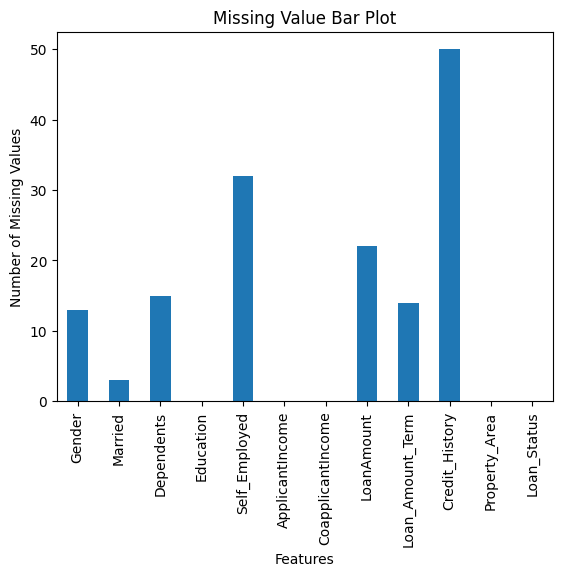

In [8]:
# count the number of missing values in each feature
missing_values = data.isnull().sum()

# create a bar plot of missing values
m1 = missing_values.plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Number of Missing Values')
plt.title('Missing Value Bar Plot')

In [9]:
name = []
value = []
percentage = []

for column in data.columns:
    if data[column].isnull().any():
            name.append(column), 
            value.append(data[column].isna().sum()),   
            percentage.append(f'{round(data[column].isna().sum()/data.shape[0]*100, 2)}%')

pd.DataFrame(
    {'Name':name, 'Value':value, 'Percentage':percentage}
)

,Name,Value,Percentage
0,Gender,13,2.12%
1,Married,3,0.49%
2,Dependents,15,2.44%
3,Self_Employed,32,5.21%
4,LoanAmount,22,3.58%
5,Loan_Amount_Term,14,2.28%
6,Credit_History,50,8.14%


In [10]:
data[data.isnull().any(axis=1)].shape[0]

134

In [11]:
data.nunique()

Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [31]:
from sklearn.impute import SimpleImputer

impute_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
impute_mean = SimpleImputer(missing_values=np.nan, strategy='mean')

from sklearn.impute import KNNImputer

impute_knn = KNNImputer(missing_values=np.nan, n_neighbors=5)

In [14]:
data['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

In [13]:
data['Gender'] = impute_mode.fit_transform(data[['Gender']])

In [14]:
# data[
#     (data['Married'].isnull()) 
#     &
#     (data['CoapplicantIncome']>0)
#     ][['Married']].fillna(value='Yes', inplace=True)

# data[
#     (data['Married'].isnull())
#     & 
#     (data['CoapplicantIncome']<=0)
#     ][['Married']].fillna(value='No', inplace=True)

data['Married'] = impute_mode.fit_transform(data[['Married']])

In [15]:
data.isnull().sum()

Gender                0
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
data[data.isna().any(axis=1)]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
11,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
16,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
19,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
24,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
...,...,...,...,...,...,...,...,...,...,...,...,...
583,Male,Yes,1,Graduate,No,1880,0.0,61.0,360.0,NaN,Rural,N
597,Male,No,NaN,Graduate,No,2987,0.0,88.0,360.0,0.0,Semiurban,N
600,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N
601,Male,Yes,0,Not Graduate,NaN,2894,2792.0,155.0,360.0,1.0,Rural,Y


In [17]:
data[['LoanAmount', 'Loan_Amount_Term']][data.isnull().any(axis=1)]

,LoanAmount,Loan_Amount_Term
0,NaN,360.0
11,109.0,360.0
16,100.0,240.0
19,115.0,NaN
24,151.0,360.0
...,...,...
583,61.0,360.0
597,88.0,360.0
600,350.0,180.0
601,155.0,360.0
